# Part 1: London’s underground resilience

## I. Topological network


In this part, you will 

* evaluate the resilience of the London’s underground through the __removal of stations__ that can potentially make the __underground vulnerable__. 

Through the procedure outlined below you will 

* investigate which are the __stations that are most critical__ for the functioning of the underground, and 
* which __methodology is more appropriate__ to finding these stations.

#### I.0.0 read data

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance

In [ ]:
# read in the graph file
Londongraph = nx.read_graphml('./WK10P/outputs/London.graph')
# print some basic information about the graph
print(nx.info(Londongraph))

Graph with 401 nodes and 467 edges


/tmp/ipykernel_105/2506539137.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(Londongraph))


In [ ]:
Londonflow = pd.read_csv("./WK10P/outputs/london_flows.csv")
# Londonflow = Londonflow.drop(Londonflow[Londonflow['station_destination'] == 'Battersea Park'].index)
Londonflow.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


### I.1. Centrality measures


Select __3 centrality measures__ to characterise nodes, aiming at 

* identifying the most important __nodes__ in this particular network. 
* Give the __definition__ of each of the measures (including their equation), 
* put the measures into __the context of the underground__, and 
* __why__ they will allow you to find the stations that are most crucial for the functioning of the underground. 
* __Compute__ the measures for your __nodes__ in the network, and 
* give the results in a table for the __first 10 ranked nodes__ for __each of the 3 measures__.

#### I.1.1 Degree Centrality

* __Identifying the most important nodes__

* __Give the definition of each of the measures (including their equation)__

* __Explain the measure in the context of the underground__

* __why they will allow you to find the stations that are most crucial for the functioning of the underground__


In [ ]:
deg_LD=nx.degree(Londongraph)
deg_norm =nx.degree_centrality(Londongraph)
DC_LD = dict(deg_norm)
degree_centrality = pd.DataFrame.from_dict(DC_LD,columns=['degree_centrality'],orient='index')
degree_centrality = degree_centrality.sort_values(by='degree_centrality', ascending=False)[0:10]
degree_centrality

,degree_centrality
Stratford,0.0225
Bank and Monument,0.0200
Baker Street,0.0175
King's Cross St. Pancras,0.0175
Canning Town,0.0150
Green Park,0.0150
Earl's Court,0.0150
West Ham,0.0150
Liverpool Street,0.0150
Oxford Circus,0.0150


In [ ]:
top10degree_centr = degree_centrality.index.to_list()
top10degree_centr

['Stratford',
 'Bank and Monument',
 'Baker Street',
 "King's Cross St. Pancras",
 'Canning Town',
 'Green Park',
 "Earl's Court",
 'West Ham',
 'Liverpool Street',
 'Oxford Circus']

deg_color=[(node['degree']) for i, node in Londongraph.nodes(data=True)]
deg_size=[(float(node['degree'])/max(deg_color)*1000) for i, node in Londongraph.nodes(data=True)]

fig, ax = plt.subplots(figsize=(10,10))
pos=nx.spring_layout(Londongraph)
nx.draw_networkx_labels(Londongraph, pos,font_size=3,
        font_color='grey')
nx.draw_networkx_edges(Londongraph, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(Londongraph,
        pos = pos,
        node_color= deg_color,
        node_size= 20)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London Tube Network Ranked by Degree Centrality",fontsize=15)
plt.show()

#### I.1.2 Topological Closeness Centrality

* __Identifying the most important nodes__

WRITE HERE

* __Give the definition of each of the measures (including their equation)__

WRITE HERE

* __Explain the measure in the context of the underground__

WRITE HERE
* __why they will allow you to find the stations that are most crucial for the functioning of the underground__

WRITE HERE

In [ ]:
# CALCULATE
clos_top_LD=nx.closeness_centrality(Londongraph) #topological closeness

In [ ]:
nx.set_node_attributes(Londongraph,clos_top_LD,'closeness_top') # add the closeness centrality as attribute
closeness_top = pd.DataFrame.from_dict(clos_top_LD,columns=['closeness_top'],orient='index')
closeness_top = closeness_top.sort_values(by='closeness_top', ascending=False)[0:10]
closeness_top

,closeness_top
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [ ]:
top10closeness_top = closeness_top.index.to_list()
top10closeness_top

['Green Park',
 'Bank and Monument',
 "King's Cross St. Pancras",
 'Westminster',
 'Waterloo',
 'Oxford Circus',
 'Bond Street',
 'Farringdon',
 'Angel',
 'Moorgate']

```
there are Just moderate differences among nodes.
```

#### I.1.3 Topological Betweenness Centrality

In [ ]:
# COMPUTE
bet_top_LD=nx.betweenness_centrality(Londongraph,normalized=False)
betweenness_top = pd.DataFrame.from_dict(bet_top_LD,columns=['betweenness_top'],orient='index')
betweenness_top = betweenness_top.sort_values(by='betweenness_top', ascending=False)[0:10]
betweenness_top

,betweenness_top
Stratford,23768.093434
Bank and Monument,23181.058947
Liverpool Street,21610.387049
King's Cross St. Pancras,20373.521465
Waterloo,19464.882323
Green Park,17223.622114
Euston,16624.275469
Westminster,16226.155916
Baker Street,15287.107612
Finchley Road,13173.758009


In [ ]:
bet_top_LD_norm=nx.betweenness_centrality(Londongraph,normalized=True)
bet_top_LD_norm = pd.DataFrame.from_dict(bet_top_LD_norm,columns=['bet_top_norm'],orient='index')
bet_top_LD_norm = bet_top_LD_norm.sort_values(by='bet_top_norm', ascending=False)[0:10]
bet_top_LD_norm

,bet_top_norm
Stratford,0.297846
Bank and Monument,0.290489
Liverpool Street,0.270807
King's Cross St. Pancras,0.255307
Waterloo,0.243921
Green Park,0.215835
Euston,0.208324
Westminster,0.203335
Baker Street,0.191568
Finchley Road,0.165085


In [ ]:
top10bet_top = bet_top_LD_norm.index.to_list()
top10bet_top

['Stratford',
 'Bank and Monument',
 'Liverpool Street',
 "King's Cross St. Pancras",
 'Waterloo',
 'Green Park',
 'Euston',
 'Westminster',
 'Baker Street',
 'Finchley Road']

```
Top 2 are significantly higher than the rest
```

### I.2. Impact measures:

* Find __2 different measures__ to evaluate the impact of the node removal on the network. 

These need to be __global measures referring to the whole network__ and not to specific nodes or links. 

* Explain whether these two measures are __specific to the London underground__, or 
* whether they could __also__ be used to evaluate the resilience of __any other network__.

#### I.2.1 Components

Get the connected components in the updated graph
components = list(nx.connected_components(graph))

Compute the size of the biggest component in each case
biggest_component_sizes = [len(component) for component in components ]
biggest_component_size = max(biggest_component_sizes)

print(f"The graph has {len(components )} connected components.")
print(f"The size of the biggest component is {biggest_component_size}.")

In [ ]:
#### I.2.2 average Shortest path length

compute the average shortest path length
avg_shortest_path = nx.average_shortest_path_length(G)

print("The average shortest path length of the graph is: ", avg_shortest_path)

#### I.2.3 Assortativity measures

the similarity of connections in the graph with respect to the node degree.



#### I.2.4 Assortativity measures
the similarity of connections in the graph with respect to the node degree.

### I.3. Node removal

For each of the centrality measures selected in 1.

- remove at least __10 nodes__ following __two different strategies__. 



#### A) Non-sequential removal 

using your table in 1.

- remove __1 node__ at a time following the rank in the table, i.e. from the most important one to the 10th most important one. 
- After each removal, __evaluate the impact__ of the removal using your __two measures__ in 2.
- and proceed __until__ you have __removed at least 10 nodes__. 



In [ ]:
remove10_dc = top10degree_centr[0:10]
remove9_dc = top10degree_centr[0:9]
remove8_dc = top10degree_centr[0:8]
remove7_dc = top10degree_centr[0:7]
remove6_dc = top10degree_centr[0:6]
remove5_dc = top10degree_centr[0:5]
remove4_dc = top10degree_centr[0:4]
remove3_dc = top10degree_centr[0:3]
remove2_dc = top10degree_centr[0:2]
remove1_dc = top10degree_centr[0:1]

In [ ]:
remove10_tcc = top10closeness_top[0:10]
remove9_tcc = top10closeness_top[0:9]
remove8_tcc = top10closeness_top[0:8]
remove7_tcc = top10closeness_top[0:7]
remove6_tcc = top10closeness_top[0:6]
remove5_tcc = top10closeness_top[0:5]
remove4_tcc = top10closeness_top[0:4]
remove3_tcc = top10closeness_top[0:3]
remove2_tcc = top10closeness_top[0:2]
remove1_tcc = top10closeness_top[0:1]

In [ ]:
remove10_tbc = top10bet_top[0:10]
remove9_tbc = top10bet_top[0:9]
remove8_tbc = top10bet_top[0:8]
remove7_tbc = top10bet_top[0:7]
remove6_tbc = top10bet_top[0:6]
remove5_tbc = top10bet_top[0:5]
remove4_tbc = top10bet_top[0:4]
remove3_tbc = top10bet_top[0:3]
remove2_tbc = top10bet_top[0:2]
remove1_tbc = top10bet_top[0:1]

In [ ]:
# remove the nodes from the graph
LG_remove1_dc = Londongraph.copy()
LG_remove1_dc.remove_nodes_from(remove1_dc)
LG_remove2_dc = Londongraph.copy()
LG_remove2_dc.remove_nodes_from(remove2_dc)
LG_remove3_dc = Londongraph.copy()
LG_remove3_dc.remove_nodes_from(remove3_dc)
LG_remove4_dc = Londongraph.copy()
LG_remove4_dc.remove_nodes_from(remove4_dc)
LG_remove5_dc = Londongraph.copy()
LG_remove5_dc.remove_nodes_from(remove5_dc)

LG_remove6_dc = Londongraph.copy()
LG_remove6_dc.remove_nodes_from(remove6_dc)
LG_remove7_dc = Londongraph.copy()
LG_remove7_dc.remove_nodes_from(remove7_dc)
LG_remove8_dc = Londongraph.copy()
LG_remove8_dc.remove_nodes_from(remove8_dc)
LG_remove9_dc = Londongraph.copy()
LG_remove9_dc.remove_nodes_from(remove9_dc)
LG_remove10_dc = Londongraph.copy()
LG_remove10_dc.remove_nodes_from(remove10_dc)

In [ ]:
# remove the nodes from the graph
LG_remove1_tcc = Londongraph.copy()
LG_remove1_tcc.remove_nodes_from(remove1_tcc)
LG_remove2_tcc = Londongraph.copy()
LG_remove2_tcc.remove_nodes_from(remove2_tcc)
LG_remove3_tcc = Londongraph.copy()
LG_remove3_tcc.remove_nodes_from(remove3_tcc)
LG_remove4_tcc = Londongraph.copy()
LG_remove4_tcc.remove_nodes_from(remove4_tcc)
LG_remove5_tcc = Londongraph.copy()
LG_remove5_tcc.remove_nodes_from(remove5_tcc)

LG_remove6_tcc = Londongraph.copy()
LG_remove6_tcc.remove_nodes_from(remove6_tcc)
LG_remove7_tcc = Londongraph.copy()
LG_remove7_tcc.remove_nodes_from(remove7_tcc)
LG_remove8_tcc = Londongraph.copy()
LG_remove8_tcc.remove_nodes_from(remove8_tcc)
LG_remove9_tcc = Londongraph.copy()
LG_remove9_tcc.remove_nodes_from(remove9_tcc)
LG_remove10_tcc = Londongraph.copy()
LG_remove10_tcc.remove_nodes_from(remove10_tcc)

In [ ]:
# remove the nodes from the graph
LG_remove1_tbc = Londongraph.copy()
LG_remove1_tbc.remove_nodes_from(remove1_tbc)
LG_remove2_tbc = Londongraph.copy()
LG_remove2_tbc.remove_nodes_from(remove2_tbc)
LG_remove3_tbc = Londongraph.copy()
LG_remove3_tbc.remove_nodes_from(remove3_tbc)
LG_remove4_tbc = Londongraph.copy()
LG_remove4_tbc.remove_nodes_from(remove4_tbc)
LG_remove5_tbc = Londongraph.copy()
LG_remove5_tbc.remove_nodes_from(remove5_tbc)

LG_remove6_tbc = Londongraph.copy()
LG_remove6_tbc.remove_nodes_from(remove6_tbc)
LG_remove7_tbc = Londongraph.copy()
LG_remove7_tbc.remove_nodes_from(remove7_tbc)
LG_remove8_tbc = Londongraph.copy()
LG_remove8_tbc.remove_nodes_from(remove8_tbc)
LG_remove9_tbc = Londongraph.copy()
LG_remove9_tbc.remove_nodes_from(remove9_tbc)
LG_remove10_tbc = Londongraph.copy()
LG_remove10_tbc.remove_nodes_from(remove10_tbc)

In [ ]:
graphs_dc = [Londongraph, LG_remove1_dc, LG_remove2_dc, LG_remove3_dc, LG_remove4_dc, LG_remove5_dc, LG_remove6_dc, LG_remove7_dc, LG_remove8_dc, LG_remove9_dc, LG_remove10_dc]
graphs_tcc = [Londongraph, LG_remove1_tcc, LG_remove2_tcc, LG_remove3_tcc, LG_remove4_tcc, LG_remove5_tcc, LG_remove6_tcc, LG_remove7_tcc, LG_remove8_tcc, LG_remove9_tcc, LG_remove10_tcc]
graphs_tbc = [Londongraph, LG_remove1_tbc, LG_remove2_tbc, LG_remove3_tbc, LG_remove4_tbc, LG_remove5_tbc, LG_remove6_tbc, LG_remove7_tbc, LG_remove8_tbc, LG_remove9_tbc, LG_remove10_tbc]

##### define Two Measure --- components & average degree assortativity

In [ ]:
def two_measure(graph):
    
    edges = graph.number_of_edges()
    nodes = graph.number_of_nodes()
    
    # Get the connected components in the graph
    components = list(nx.connected_components(graph))
    comp_num = nx.number_connected_components(graph)
    # Compute the size of the biggest component
    biggest_component_sizes = [len(component) for component in components]
    biggest_component_size = max(biggest_component_sizes)
    
    # compute the average degree assortativity
    degree_assortativity = nx.degree_pearson_correlation_coefficient(graph)
  
    # Create an empty DataFrame
    measure_results = pd.DataFrame()
    
    # return a dictionary with the results
    data = {'edges':edges, 'nodes': nodes, 'component': components, 'M1_components' : comp_num ,'M1_biggest_comp': biggest_component_size, 'M2_degree_assort' : degree_assortativity}
    measure_results = pd.DataFrame(data)
    measure_results = measure_results.drop('component', axis=1)[0:1]
    return measure_results

##### degree centrality top 10 nodes 

In [ ]:
df_list = []
for graph in graphs_dc:
    df_list.append(two_measure(graph))
dc_result = pd.concat(df_list, ignore_index=True)
dc_result['removed_station'] = ['NA'] + remove10_dc
dc_result

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.172911,NA
1,458,400,3,379,0.199189,Stratford
2,450,399,3,378,0.169632,Bank and Monument
3,443,398,3,377,0.165922,Baker Street
4,436,397,4,374,0.182491,King's Cross St. Pancras
5,430,396,6,360,0.202764,Canning Town
6,424,395,6,359,0.131824,Green Park
7,418,394,6,358,0.094856,Earl's Court
8,414,393,8,354,0.116114,West Ham
9,410,392,9,348,0.109374,Liverpool Street


Text(0.5, 0, 'Removed station')

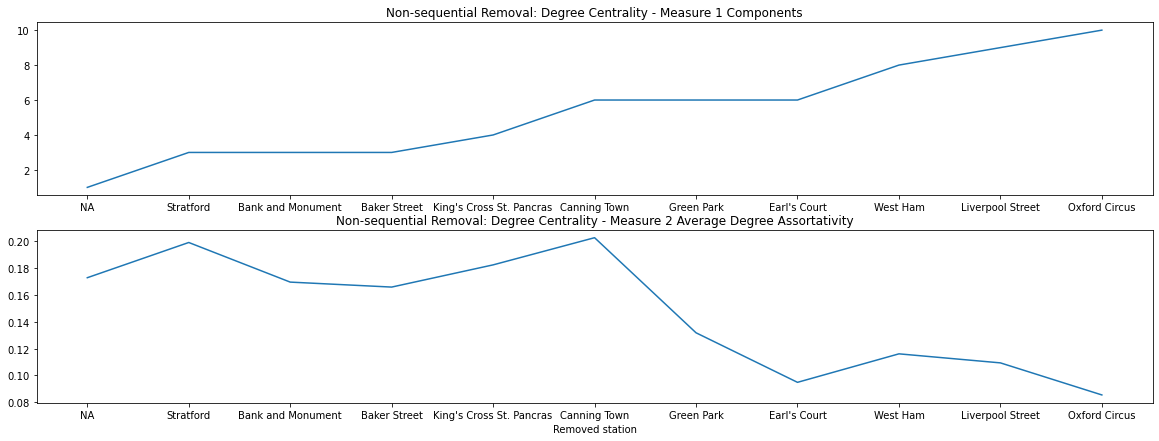

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,7))
ax1.plot(dc_result.removed_station, dc_result.M1_components)
ax1.set_title('Non-sequential Removal: Degree Centrality - Measure 1 Components')
ax2.plot(dc_result.removed_station, dc_result.M2_degree_assort)
ax2.set_title('Non-sequential Removal: Degree Centrality - Measure 2 Average Degree Assortativity')
ax2.set_xlabel('Removed station')

##### topological closeness centrality top 10 nodes 

In [ ]:
df_list = []
for graph in graphs_tcc:
    df_list.append(two_measure(graph))
tcc_result = pd.concat(df_list, ignore_index=True)
tcc_result['removed_station'] = ['NA'] + remove10_tcc
tcc_result

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.172911,NA
1,461,400,1,400,0.144665,Green Park
2,453,399,1,399,0.099081,Bank and Monument
3,446,398,1,398,0.106048,King's Cross St. Pancras
4,443,397,1,397,0.101691,Westminster
5,439,396,1,396,0.101468,Waterloo
6,434,395,1,395,0.076072,Oxford Circus
7,432,394,1,394,0.086508,Bond Street
8,431,393,1,393,0.084470,Farringdon
9,430,392,1,392,0.082428,Angel


Text(0.5, 0, 'Removed station')

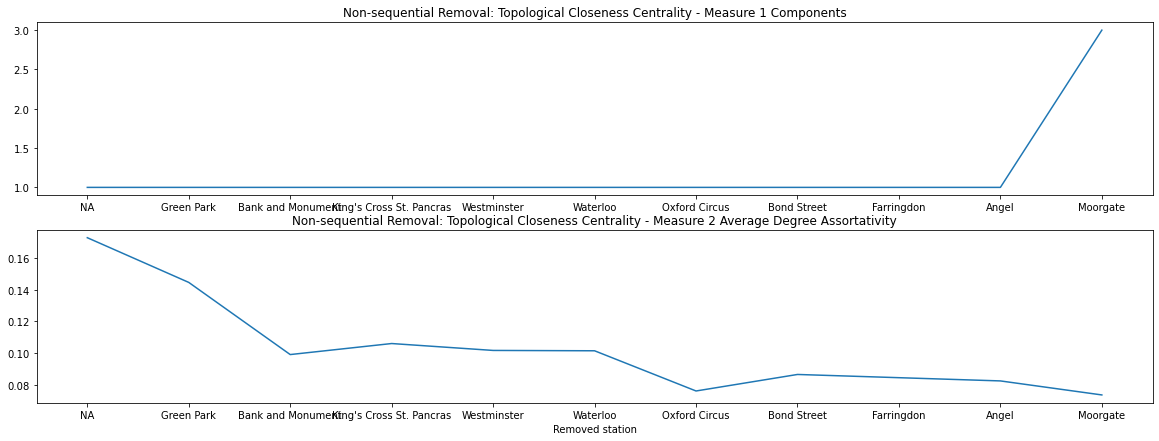

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,7))
ax1.plot(tcc_result.removed_station, tcc_result.M1_components)
ax1.set_title('Non-sequential Removal: Topological Closeness Centrality - Measure 1 Components')
ax2.plot(tcc_result.removed_station, tcc_result.M2_degree_assort)
ax2.set_title('Non-sequential Removal: Topological Closeness Centrality - Measure 2 Average Degree Assortativity')
ax2.set_xlabel('Removed station')

##### topological betweenness centrality top 10 nodes

In [ ]:
df_list = []
for graph in graphs_tbc:
    df_list.append(two_measure(graph))
tbc_result = pd.concat(df_list, ignore_index=True)
tbc_result['removed_station'] = ['NA'] + remove10_tbc
tbc_result

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.172911,NA
1,458,400,3,379,0.199189,Stratford
2,450,399,3,378,0.169632,Bank and Monument
3,446,398,3,377,0.171308,Liverpool Street
4,439,397,4,371,0.187006,King's Cross St. Pancras
5,434,396,4,370,0.171124,Waterloo
6,428,395,4,369,0.106134,Green Park
7,424,394,5,346,0.102531,Euston
8,422,393,5,345,0.101135,Westminster
9,415,392,6,342,0.093029,Baker Street


Text(0.5, 0, 'Removed station')

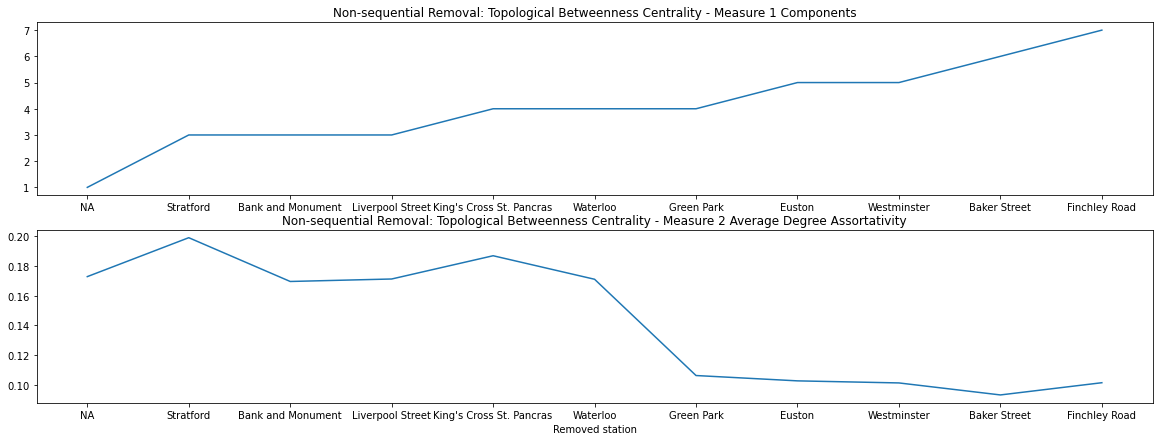

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,7))
ax1.plot(tbc_result.removed_station, tbc_result.M1_components)
ax1.set_title('Non-sequential Removal: Topological Betweenness Centrality - Measure 1 Components')
ax2.plot(tbc_result.removed_station, tbc_result.M2_degree_assort)
ax2.set_title('Non-sequential Removal: Topological Betweenness Centrality - Measure 2 Average Degree Assortativity')
ax2.set_xlabel('Removed station')

#### B) Sequential

* __remove the highest ranked node__ and evaluate the impact using the 2 measures. After removal, 
* __re-compute the centrality measure__. 
* __Remove the highest ranked node__ in the new network and 
* __evaluate the impact__. 
* Continue __until removing at least 10 nodes__


__Report the results of the 2 strategies in one plot__, and critically discuss the following: 

* __which centrality measure__ reflects better the importance of a station for the functioning of the underground, 
* __which strategy__ is more effective at studying resilience, and 
* __which impact measure__ is better at assessing the damage after node removal.

1. compute the centrality measure and remove the highest ranked node
2. calculate 2 measures
3. compute the centrality measure and remove the highest ranked node
4. calculate 2 measures
....

##### B-1 degree centrality

In [ ]:
DC_seq0 = Londongraph.copy()
DC_seq0_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq0)),columns=['degree_centrality'],orient='index')
DC_seq0_df = DC_seq0_df.sort_values(by='degree_centrality', ascending=False)

LG_1_dc_seq = Londongraph.copy()
LG_1_dc_seq.remove_nodes_from(DC_seq0_df[0:1].index.to_list())
DC_seq0_df[0:1].index.to_list()

['Stratford']

In [ ]:
DC_seq1 = LG_1_dc_seq.copy()
DC_seq1_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq1)),columns=['degree_centrality'],orient='index')
DC_seq1_df = DC_seq1_df.sort_values(by='degree_centrality', ascending=False)

LG_2_dc_seq = LG_1_dc_seq.copy()
LG_2_dc_seq.remove_nodes_from(DC_seq1_df[0:1].index.to_list())
DC_seq1_df[0:1].index.to_list()

['Bank and Monument']

In [ ]:
DC_seq2 = LG_2_dc_seq.copy()
DC_seq2_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq2)),columns=['degree_centrality'],orient='index')
DC_seq2_df = DC_seq2_df.sort_values(by='degree_centrality', ascending=False)

LG_3_dc_seq = LG_2_dc_seq.copy()
LG_3_dc_seq.remove_nodes_from(DC_seq2_df[0:1].index.to_list())
DC_seq2_df[0:1].index.to_list()

["King's Cross St. Pancras"]

In [ ]:
DC_seq3 = LG_3_dc_seq.copy()
DC_seq3_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq3)),columns=['degree_centrality'],orient='index')
DC_seq3_df = DC_seq3_df.sort_values(by='degree_centrality', ascending=False)
# DC_seq3_df[0:5]
LG_4_dc_seq = LG_3_dc_seq.copy()
LG_4_dc_seq.remove_nodes_from(DC_seq3_df[0:1].index.to_list())
DC_seq3_df[0:1].index.to_list()

['Baker Street']

In [ ]:
DC_seq4 = LG_4_dc_seq.copy()
DC_seq4_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq4)),columns=['degree_centrality'],orient='index')
DC_seq4_df = DC_seq4_df.sort_values(by='degree_centrality', ascending=False)
# DC_seq4_df[0:5]
LG_5_dc_seq = LG_4_dc_seq.copy()
LG_5_dc_seq.remove_nodes_from(DC_seq4_df[0:1].index.to_list())
DC_seq4_df[0:1].index.to_list()

['Canning Town']

In [ ]:
DC_seq5 = LG_5_dc_seq.copy()
DC_seq5_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq5)),columns=['degree_centrality'],orient='index')
DC_seq5_df = DC_seq5_df.sort_values(by='degree_centrality', ascending=False)
# DC_seq5_df[0:5]
LG_6_dc_seq = LG_5_dc_seq.copy()
LG_6_dc_seq.remove_nodes_from(DC_seq5_df[0:1].index.to_list())
DC_seq5_df[0:1].index.to_list()

['Green Park']

In [ ]:
DC_seq6 = LG_6_dc_seq.copy()
DC_seq6_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq6)),columns=['degree_centrality'],orient='index')
DC_seq6_df = DC_seq6_df.sort_values(by='degree_centrality', ascending=False)
# DC_seq6_df[0:5]
LG_7_dc_seq = LG_6_dc_seq.copy()
LG_7_dc_seq.remove_nodes_from(DC_seq6_df[0:1].index.to_list())
DC_seq6_df[0:1].index.to_list()

["Earl's Court"]

In [ ]:
DC_seq7 = LG_7_dc_seq.copy()
DC_seq7_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq7)),columns=['degree_centrality'],orient='index')
DC_seq7_df = DC_seq7_df.sort_values(by='degree_centrality', ascending=False)
# DC_seq6_df[0:5]
LG_8_dc_seq = LG_7_dc_seq.copy()
LG_8_dc_seq.remove_nodes_from(DC_seq7_df[0:1].index.to_list())
DC_seq7_df[0:1].index.to_list()

['Willesden Junction']

In [ ]:
DC_seq8 = LG_8_dc_seq.copy()
DC_seq8_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq8)),columns=['degree_centrality'],orient='index')
DC_seq8_df = DC_seq8_df.sort_values(by='degree_centrality', ascending=False)
# DC_seq6_df[0:5]
LG_9_dc_seq = LG_8_dc_seq.copy()
LG_9_dc_seq.remove_nodes_from(DC_seq8_df[0:1].index.to_list())
DC_seq8_df[0:1].index.to_list()

['Turnham Green']

In [ ]:
DC_seq9 = LG_9_dc_seq.copy()
DC_seq9_df = pd.DataFrame.from_dict(dict(nx.degree_centrality(DC_seq9)),columns=['degree_centrality'],orient='index')
DC_seq9_df = DC_seq9_df.sort_values(by='degree_centrality', ascending=False)
# DC_seq6_df[0:5]
LG_10_dc_seq = LG_9_dc_seq.copy()
LG_10_dc_seq.remove_nodes_from(DC_seq9_df[0:1].index.to_list())
DC_seq9_df[0:1].index.to_list()

['Oxford Circus']

In [ ]:
dc_seq_stations = ['NA'] + DC_seq0_df[0:1].index.to_list()+ DC_seq1_df[0:1].index.to_list() + DC_seq2_df[0:1].index.to_list() + DC_seq3_df[0:1].index.to_list() + DC_seq4_df[0:1].index.to_list() + DC_seq5_df[0:1].index.to_list() + DC_seq6_df[0:1].index.to_list() + DC_seq7_df[0:1].index.to_list() + DC_seq8_df[0:1].index.to_list() + DC_seq9_df[0:1].index.to_list() 

##### B-2 topological closeness centrality

In [ ]:
tcc_seq0 = Londongraph.copy()
tcc_seq0_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq0)),columns=['closeness_top'],orient='index')
tcc_seq0_df = tcc_seq0_df.sort_values(by='closeness_top', ascending=False)

LG_1_tcc_seq = Londongraph.copy()
LG_1_tcc_seq.remove_nodes_from(tcc_seq0_df[0:1].index.to_list())
tcc_seq0_df[0:1].index.to_list()

['Green Park']

In [ ]:
tcc_seq1 = LG_1_tcc_seq.copy()
tcc_seq1_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq1)),columns=['closeness_top'],orient='index')
tcc_seq1_df = tcc_seq1_df.sort_values(by='closeness_top', ascending=False)

LG_2_tcc_seq = LG_1_tcc_seq.copy()
LG_2_tcc_seq.remove_nodes_from(tcc_seq1_df[0:1].index.to_list())
tcc_seq1_df[0:1].index.to_list()

["King's Cross St. Pancras"]

In [ ]:
tcc_seq2 = LG_2_tcc_seq.copy()
tcc_seq2_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq2)),columns=['closeness_top'],orient='index')
tcc_seq2_df = tcc_seq2_df.sort_values(by='closeness_top', ascending=False)

LG_3_tcc_seq = LG_2_tcc_seq.copy()
LG_3_tcc_seq.remove_nodes_from(tcc_seq2_df[0:1].index.to_list())
tcc_seq2_df[0:1].index.to_list()

['Waterloo']

In [ ]:
tcc_seq3 = LG_3_tcc_seq.copy()
tcc_seq3_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq3)),columns=['closeness_top'],orient='index')
tcc_seq3_df = tcc_seq3_df.sort_values(by='closeness_top', ascending=False)

LG_4_tcc_seq = LG_3_tcc_seq.copy()
LG_4_tcc_seq.remove_nodes_from(tcc_seq3_df[0:1].index.to_list())
tcc_seq3_df[0:1].index.to_list()

['Bank and Monument']

In [ ]:
tcc_seq4 = LG_4_tcc_seq.copy()
tcc_seq4_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq4)),columns=['closeness_top'],orient='index')
tcc_seq4_df = tcc_seq4_df.sort_values(by='closeness_top', ascending=False)

LG_5_tcc_seq = LG_4_tcc_seq.copy()
LG_5_tcc_seq.remove_nodes_from(tcc_seq4_df[0:1].index.to_list())
tcc_seq4_df[0:1].index.to_list()

['West Hampstead']

In [ ]:
tcc_seq5 = LG_5_tcc_seq.copy()
tcc_seq5_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq5)),columns=['closeness_top'],orient='index')
tcc_seq5_df = tcc_seq5_df.sort_values(by='closeness_top', ascending=False)

LG_6_tcc_seq = LG_5_tcc_seq.copy()
LG_6_tcc_seq.remove_nodes_from(tcc_seq5_df[0:1].index.to_list())
tcc_seq5_df[0:1].index.to_list()

['Canada Water']

In [ ]:
tcc_seq6 = LG_6_tcc_seq.copy()
tcc_seq6_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq6)),columns=['closeness_top'],orient='index')
tcc_seq6_df = tcc_seq6_df.sort_values(by='closeness_top', ascending=False)

LG_7_tcc_seq = LG_6_tcc_seq.copy()
LG_7_tcc_seq.remove_nodes_from(tcc_seq6_df[0:1].index.to_list())
tcc_seq6_df[0:1].index.to_list()

['Stratford']

In [ ]:
tcc_seq7 = LG_7_tcc_seq.copy()
tcc_seq7_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq7)),columns=['closeness_top'],orient='index')
tcc_seq7_df = tcc_seq7_df.sort_values(by='closeness_top', ascending=False)

LG_8_tcc_seq = LG_7_tcc_seq.copy()
LG_8_tcc_seq.remove_nodes_from(tcc_seq7_df[0:1].index.to_list())
tcc_seq7_df[0:1].index.to_list()

["Earl's Court"]

In [ ]:
tcc_seq8 = LG_8_tcc_seq.copy()
tcc_seq8_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq8)),columns=['closeness_top'],orient='index')
tcc_seq8_df = tcc_seq8_df.sort_values(by='closeness_top', ascending=False)

LG_9_tcc_seq = LG_8_tcc_seq.copy()
LG_9_tcc_seq.remove_nodes_from(tcc_seq8_df[0:1].index.to_list())
tcc_seq8_df[0:1].index.to_list()

["Shepherd's Bush"]

In [ ]:
tcc_seq9 = LG_9_tcc_seq.copy()
tcc_seq9_df = pd.DataFrame.from_dict(dict(nx.closeness_centrality(tcc_seq9)),columns=['closeness_top'],orient='index')
tcc_seq9_df = tcc_seq9_df.sort_values(by='closeness_top', ascending=False)

LG_10_tcc_seq = LG_9_tcc_seq.copy()
LG_10_tcc_seq.remove_nodes_from(tcc_seq9_df[0:1].index.to_list())
tcc_seq9_df[0:1].index.to_list()

['Oxford Circus']

In [ ]:
tcc_seq_stations = ['NA'] + tcc_seq0_df[0:1].index.to_list()+ tcc_seq1_df[0:1].index.to_list() + tcc_seq2_df[0:1].index.to_list() + tcc_seq3_df[0:1].index.to_list() + tcc_seq4_df[0:1].index.to_list() + tcc_seq5_df[0:1].index.to_list() + tcc_seq6_df[0:1].index.to_list() + tcc_seq7_df[0:1].index.to_list() + tcc_seq8_df[0:1].index.to_list() + tcc_seq9_df[0:1].index.to_list() 

##### B-3 topological betweenness centrality

In [ ]:
tbc_seq0 = Londongraph.copy()
tbc_seq0_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq0,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq0_df = tbc_seq0_df.sort_values(by='betweenness_top', ascending=False)

LG_1_tbc_seq = Londongraph.copy()
LG_1_tbc_seq.remove_nodes_from(tbc_seq0_df[0:1].index.to_list())
tbc_seq0_df[0:1].index.to_list()

['Stratford']

In [ ]:
tbc_seq1 = LG_1_tbc_seq.copy()
tbc_seq1_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq1,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq1_df = tbc_seq1_df.sort_values(by='betweenness_top', ascending=False)

LG_2_tbc_seq = LG_1_tbc_seq.copy()
LG_2_tbc_seq.remove_nodes_from(tbc_seq1_df[0:1].index.to_list())
tbc_seq1_df[0:1].index.to_list()

["King's Cross St. Pancras"]

In [ ]:
tbc_seq2 = LG_2_tbc_seq.copy()
tbc_seq2_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq2,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq2_df = tbc_seq2_df.sort_values(by='betweenness_top', ascending=False)

LG_3_tbc_seq = LG_2_tbc_seq.copy()
LG_3_tbc_seq.remove_nodes_from(tbc_seq2_df[0:1].index.to_list())
tbc_seq2_df[0:1].index.to_list()

['Waterloo']

In [ ]:
tbc_seq3 = LG_3_tbc_seq.copy()
tbc_seq3_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq3,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq3_df = tbc_seq3_df.sort_values(by='betweenness_top', ascending=False)

LG_4_tbc_seq = LG_3_tbc_seq.copy()
LG_4_tbc_seq.remove_nodes_from(tbc_seq3_df[0:1].index.to_list())
tbc_seq3_df[0:1].index.to_list()

['Bank and Monument']

In [ ]:
tbc_seq4 = LG_4_tbc_seq.copy()
tbc_seq4_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq4,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq4_df = tbc_seq4_df.sort_values(by='betweenness_top', ascending=False)

LG_5_tbc_seq = LG_4_tbc_seq.copy()
LG_5_tbc_seq.remove_nodes_from(tbc_seq4_df[0:1].index.to_list())
tbc_seq4_df[0:1].index.to_list()

['Canada Water']

In [ ]:
tbc_seq5 = LG_5_tbc_seq.copy()
tbc_seq5_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq5,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq5_df = tbc_seq5_df.sort_values(by='betweenness_top', ascending=False)

LG_6_tbc_seq = LG_5_tbc_seq.copy()
LG_6_tbc_seq.remove_nodes_from(tbc_seq5_df[0:1].index.to_list())
tbc_seq5_df[0:1].index.to_list()

['West Hampstead']

In [ ]:
tbc_seq6 = LG_6_tbc_seq.copy()
tbc_seq6_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq6,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq6_df = tbc_seq6_df.sort_values(by='betweenness_top', ascending=False)

LG_7_tbc_seq = LG_6_tbc_seq.copy()
LG_7_tbc_seq.remove_nodes_from(tbc_seq6_df[0:1].index.to_list())
tbc_seq6_df[0:1].index.to_list()

["Earl's Court"]

In [ ]:
tbc_seq7 = LG_7_tbc_seq.copy()
tbc_seq7_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq7,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq7_df = tbc_seq7_df.sort_values(by='betweenness_top', ascending=False)

LG_8_tbc_seq = LG_7_tbc_seq.copy()
LG_8_tbc_seq.remove_nodes_from(tbc_seq7_df[0:1].index.to_list())
tbc_seq7_df[0:1].index.to_list()

["Shepherd's Bush"]

In [ ]:
tbc_seq8 = LG_8_tbc_seq.copy()
tbc_seq8_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq8,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq8_df = tbc_seq8_df.sort_values(by='betweenness_top', ascending=False)

LG_9_tbc_seq = LG_8_tbc_seq.copy()
LG_9_tbc_seq.remove_nodes_from(tbc_seq8_df[0:1].index.to_list())
tbc_seq8_df[0:1].index.to_list()

['Euston']

In [ ]:
tbc_seq9 = LG_9_tbc_seq.copy()
tbc_seq9_df = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(tbc_seq9,normalized=False)),columns=['betweenness_top'],orient='index')
tbc_seq9_df = tbc_seq9_df.sort_values(by='betweenness_top', ascending=False)

LG_10_tbc_seq = LG_9_tbc_seq.copy()
LG_10_tbc_seq.remove_nodes_from(tbc_seq9_df[0:1].index.to_list())
tbc_seq9_df[0:1].index.to_list()

['Baker Street']

In [ ]:
# Combine the lists into one list
tbc_seq_stations = ['NA'] + tbc_seq0_df[0:1].index.to_list()+ tbc_seq1_df[0:1].index.to_list() + tbc_seq2_df[0:1].index.to_list() + tbc_seq3_df[0:1].index.to_list() + tbc_seq4_df[0:1].index.to_list() + tbc_seq5_df[0:1].index.to_list() + tbc_seq6_df[0:1].index.to_list() + tbc_seq7_df[0:1].index.to_list() + tbc_seq8_df[0:1].index.to_list() + tbc_seq9_df[0:1].index.to_list() 

##### two measure result

In [ ]:
g_dc_seq = [Londongraph, LG_1_dc_seq, LG_2_dc_seq, LG_3_dc_seq, LG_4_dc_seq, LG_5_dc_seq, LG_6_dc_seq, LG_7_dc_seq, LG_8_dc_seq, LG_9_dc_seq, LG_10_dc_seq]

g_tcc_seq = [Londongraph, LG_1_tcc_seq, LG_2_tcc_seq, LG_3_tcc_seq, LG_4_tcc_seq, LG_5_tcc_seq, LG_6_tcc_seq, LG_7_tcc_seq, LG_8_tcc_seq, LG_9_tcc_seq, LG_10_tcc_seq]

g_tbc_seq = [Londongraph, LG_1_tbc_seq, LG_2_tbc_seq, LG_3_tbc_seq, LG_4_tbc_seq, LG_5_tbc_seq, LG_6_tbc_seq, LG_7_tbc_seq, LG_8_tbc_seq, LG_9_tbc_seq, LG_10_tbc_seq]

In [ ]:
df_list = []
for graph in g_dc_seq:
    df_list.append(two_measure(graph))
dc_seq_result = pd.concat(df_list, ignore_index=True)
dc_seq_result['removed_station'] = dc_seq_stations
dc_seq_result

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.172911,NA
1,458,400,3,379,0.199189,Stratford
2,450,399,3,378,0.169632,Bank and Monument
3,443,398,3,377,0.185991,King's Cross St. Pancras
4,436,397,4,374,0.182491,Baker Street
5,430,396,6,360,0.202764,Canning Town
6,424,395,6,359,0.131824,Green Park
7,418,394,6,358,0.094856,Earl's Court
8,413,393,7,344,0.105756,Willesden Junction
9,408,392,8,338,0.090391,Turnham Green


Text(0.5, 0, 'Removed station')

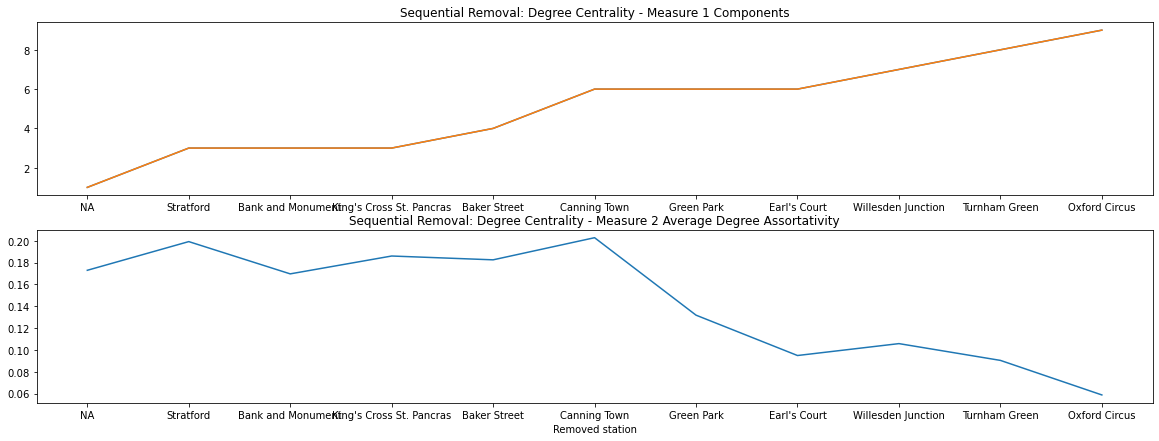

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,7))
ax1.plot(dc_seq_result.removed_station, dc_seq_result.M1_components)
ax1.plot(dc_seq_result.removed_station, dc_seq_result.M1_components)
ax1.set_title('Sequential Removal: Degree Centrality - Measure 1 Components')

ax2.plot(dc_seq_result.removed_station, dc_seq_result.M2_degree_assort)
ax2.set_title('Sequential Removal: Degree Centrality - Measure 2 Average Degree Assortativity')
ax2.set_xlabel('Removed station')


In [149]:
tcc_list = []
for graph in g_tcc_seq:
    tcc_list.append(two_measure(graph))
tcc_seq_result = pd.concat(tcc_list, ignore_index=True)
tcc_seq_result['removed_station'] = tcc_seq_stations
tcc_seq_result

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.172911,NA
1,461,400,1,400,0.144665,Green Park
2,454,399,1,399,0.157843,King's Cross St. Pancras
3,448,398,1,398,0.135890,Waterloo
4,441,397,1,397,0.102074,Bank and Monument
5,437,396,1,396,0.098283,West Hampstead
6,433,395,2,226,0.101330,Canada Water
7,424,394,4,226,0.101651,Stratford
8,418,393,4,225,0.070638,Earl's Court
9,414,392,5,195,0.067349,Shepherd's Bush


Text(0.5, 0, 'Removed station')

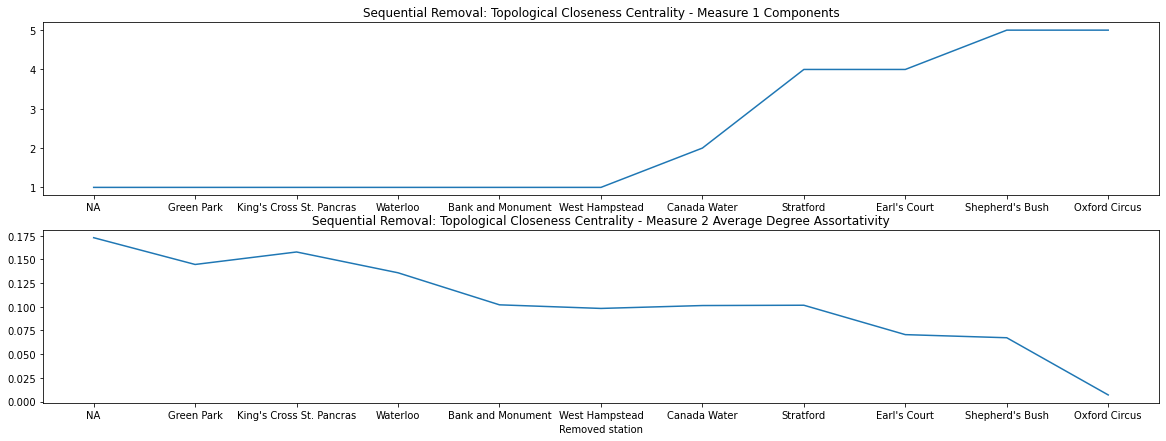

In [150]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,7))
ax1.plot(tcc_seq_result.removed_station, tcc_seq_result.M1_components)
ax1.set_title('Sequential Removal: Topological Closeness Centrality - Measure 1 Components')
ax2.plot(tcc_seq_result.removed_station, tcc_seq_result.M2_degree_assort)
ax2.set_title('Sequential Removal: Topological Closeness Centrality - Measure 2 Average Degree Assortativity')
ax2.set_xlabel('Removed station')

In [151]:
tbc_list = []
for graph in g_tbc_seq:
    tbc_list.append(two_measure(graph))
tbc_seq_result = pd.concat(tbc_list , ignore_index=True)
tbc_seq_result['removed_station'] = tbc_seq_stations
tbc_seq_result

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.172911,NA
1,458,400,3,379,0.199189,Stratford
2,451,399,3,378,0.219106,King's Cross St. Pancras
3,445,398,3,377,0.188384,Waterloo
4,438,397,3,376,0.170798,Bank and Monument
5,434,396,3,375,0.175516,Canada Water
6,430,395,4,227,0.170200,West Hampstead
7,424,394,4,226,0.153748,Earl's Court
8,420,393,5,196,0.155107,Shepherd's Bush
9,416,392,6,173,0.149491,Euston


Text(0.5, 0, 'Removed station')

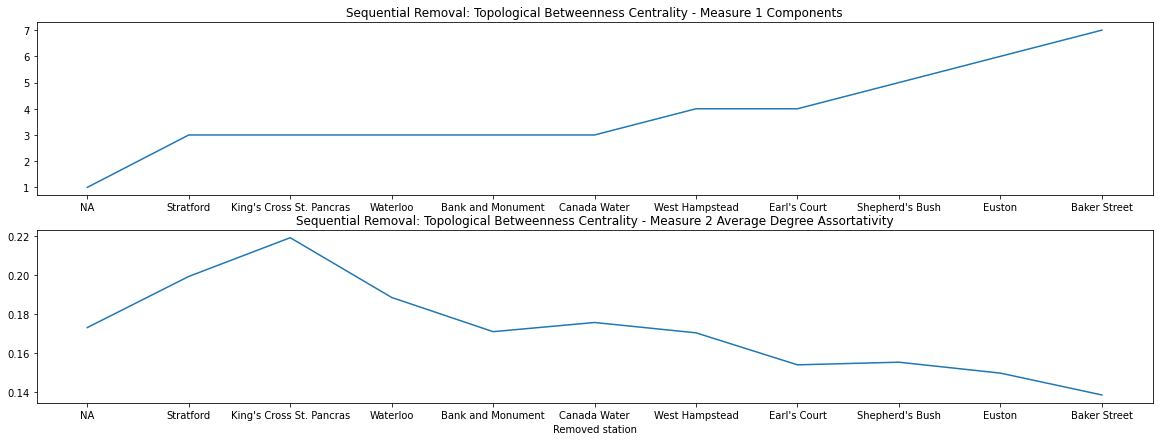

In [152]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(20,7))
ax1.plot(tbc_seq_result.removed_station, tbc_seq_result.M1_components)
ax1.set_title('Sequential Removal: Topological Betweenness Centrality - Measure 1 Components')
ax2.plot(tbc_seq_result.removed_station, tbc_seq_result.M2_degree_assort)
ax2.set_title('Sequential Removal: Topological Betweenness Centrality - Measure 2 Average Degree Assortativity')
ax2.set_xlabel('Removed station')

## II. Flows: weighted network
In this section, you will 

* include passengers into the underground, and 
* assess whether different measures need to be used when flows are considered. 

The network to use in this section is __the weighted network__ given to you in the coursework, where the flows of passengers were assigned to the links between stations.

### II.1. Consider the centrality measure derived in I.

- indicating the most relevant stations for assessing the vulnerability of the underground. 
- What would you need to do to adjust this measure for a weighted network? 
- Recompute the ranking of the __10 most important nodes__ according to this __adjusted measure__. 
- Do you find the __same ones__ as in __I.1__?

What would you need to do to adjust this measure for a weighted network?

#### degree centrality doesnt consider the weight

#### try weighted closeness centrality - no same stations

In [153]:
closeness_top

,closeness_top
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


In [154]:
clos_wei_flow = nx.closeness_centrality(Londongraph, distance = 'flows') # flows weighted closeness
nx.set_node_attributes(Londongraph,clos_wei_flow,'clos_wei_flow') # add the closeness centrality as attribute
clos_wei_f10 = pd.DataFrame.from_dict(clos_wei_flow,columns=['clos_wei_flow'],orient='index')
clos_wei_f10 = clos_wei_f10.sort_values(by='clos_wei_flow', ascending=False)[0:10]
clos_wei_f10['clos_wei_flow_000000'] = clos_wei_f10['clos_wei_flow']*1000000
clos_wei_f10_list = clos_wei_f10.index.to_list()
clos_wei_f10

,clos_wei_flow,clos_wei_flow_000000
West Hampstead,0.000006,6.134994
Finchley Road & Frognal,0.000006,6.092548
Hampstead Heath,0.000006,6.053351
Gospel Oak,0.000006,6.034154
Brondesbury,0.000006,6.031832
Upper Holloway,0.000006,5.997334
Kentish Town West,0.000006,5.955428
Crouch Hill,0.000006,5.943015
Brondesbury Park,0.000006,5.930374
Camden Road,0.000006,5.913896


In [155]:
def find_common_values(list1, list2):
    set1 = set(list1)
    set2 = set(list2)
    common_values = set1.intersection(set2)
    return common_values

common_values = find_common_values(closeness_top.index.to_list(), clos_wei_f10.index.to_list())

if len(common_values) > 0:
    print("The two lists have the following common values:", common_values)
else:
    print("The two lists do not have any common values.")

The two lists do not have any common values.


In [156]:
clos_wei_dist = nx.closeness_centrality(Londongraph, distance = 'distance') # distance weighted closeness
clos_wei_d10 = pd.DataFrame.from_dict(clos_wei_dist,columns=['clos_wei_dist'],orient='index')
clos_wei_d10 = clos_wei_d10.sort_values(by='clos_wei_dist', ascending=False)[0:10]
clos_wei_d10_list = clos_wei_d10.index.to_list()
clos_wei_d10

,clos_wei_dist
Green Park,0.114778
Bank and Monument,0.113572
King's Cross St. Pancras,0.113443
Westminster,0.112549
Waterloo,0.112265
Oxford Circus,0.111204
Bond Street,0.110988
Farringdon,0.110742
Angel,0.110742
Moorgate,0.110314


#### try weighted betweeness centrality - common values: {'Stratford'}

In [157]:
bet_wei_flow = nx.betweenness_centrality(Londongraph, weight = 'flows') # flows weighted closeness
nx.set_node_attributes(Londongraph,bet_wei_flow,'bet_wei_flow') # add the closeness centrality as attribute
bet_wei_f10 = pd.DataFrame.from_dict(bet_wei_flow,columns=['bet_wei_flow'],orient='index')
bet_wei_f10 = bet_wei_f10.sort_values(by='bet_wei_flow', ascending=False)[0:10]
bet_wei_f10_list = bet_wei_f10.index.to_list()
bet_wei_f10

,bet_wei_flow
West Hampstead,0.389821
Gospel Oak,0.312569
Finchley Road & Frognal,0.302318
Hampstead Heath,0.301717
Willesden Junction,0.287309
Stratford,0.266444
Brondesbury,0.253343
Brondesbury Park,0.251883
Kensal Rise,0.250435
Kentish Town West,0.171610


In [158]:
common_values = find_common_values(betweenness_top.index.to_list(), bet_wei_f10.index.to_list())

if len(common_values) > 0:
    print("The two lists have the following common values:", common_values)
else:
    print("The two lists do not have any common values.")

The two lists have the following common values: {'Stratford'}


### II.2. Now consider the measure for assessing the impact of node removal. 

- Would you adjust the measure for a weighted network? 
- If yes, how? 
- Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers.


In [159]:
list(Londongraph.edges(data=True))[0]

('Liverpool Street',
 'Stratford',
 {'length': 6698.461270481078, 'line_name': 'TfL Rail', 'flows': 163969})

#### define adjusted two measure

In [160]:
# Define the two_measure function
def adj_two_measure(graph):
    
    edges = graph.number_of_edges()
    nodes = graph.number_of_nodes()
    
    # Get the connected components in the graph
    components = list(nx.connected_components(graph))
    comp_num = nx.number_connected_components(graph)
    # Compute the size of the biggest component
    biggest_component_sizes = [len(component) for component in components]
    biggest_component_size = max(biggest_component_sizes)
        
    # compute the average degree assortativity
    degree_assort = nx.degree_pearson_correlation_coefficient(graph, weight = 'flows')
  
    # Create an empty DataFrame
    measure_results = pd.DataFrame()
    
    # return a dictionary with the results
    data = {'edges':edges, 'nodes': nodes, 'component': components, 'M1_components' : comp_num ,'M1_biggest_comp': biggest_component_size, 'M2_degree_assort' : degree_assort}
    measure_results = pd.DataFrame(data)
    measure_results = measure_results.drop('component', axis=1)[0:1]
    return measure_results

In [161]:
adj_two_measure(LG_remove1_dc)

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort
0,458,400,3,379,0.440153


#### define new measure

In [162]:
def new_measure(graph):

    edges = graph.number_of_edges()
    nodes = graph.number_of_nodes()
    
    # compute weighted graph
    df_list = []
    
    for comp in list(nx.connected_components(graph)):
        subgraph = graph.subgraph(comp)
        a_s_p_l = nx.average_shortest_path_length(subgraph, weight = 'flows')
        df_list.append(a_s_p_l)
        
    # Create an empty DataFrame
    measure_results = pd.DataFrame()
    
    # return a dictionary with the results
    data = {'edges':edges, 'nodes': nodes,'aver_shorte_path_length_w' : [max(df_list)]}
    measure_results = pd.DataFrame(data)
    return measure_results

In [163]:
new_measure(LG_remove1_dc)

,edges,nodes,aver_shorte_path_length_w
0,458,400,250854.751532


### II.3. Remove only the 3 highest ranked nodes according to the best performing centrality measure found in I.1. 

- Evaluate the impact according to the 2 measures in II.2. 
- Repeat the experiment for the highest 3 ranked nodes using the adjusted measure. 
- Critically discuss which station closure will have the largest impact on passengers, referring to your measures and results.

#### calculate weighted betweeness centrality

In [164]:
betweenness_top.index.to_list()[0:3]

['Stratford', 'Bank and Monument', 'Liverpool Street']

In [165]:
bet_wei = nx.betweenness_centrality(Londongraph,normalized=False, weight = 'flows')
bet_weight = pd.DataFrame.from_dict(bet_wei,columns=['bet_top_wei'],orient='index')
bet_weight = bet_weight.sort_values(by='bet_top_wei', ascending=False)[0:3]
bet_weight

,bet_top_wei
West Hampstead,31107.75
Gospel Oak,24943.00
Finchley Road & Frognal,24125.00


In [166]:
remove1_wbc = bet_weight.index.to_list()[0:1]
remove2_wbc = bet_weight.index.to_list()[0:2]
remove3_wbc = bet_weight.index.to_list()[0:3]

In [167]:
LG_remove1_wbc = Londongraph.copy()
LG_remove1_wbc.remove_nodes_from(remove1_wbc)
LG_remove2_wbc = Londongraph.copy()
LG_remove2_wbc.remove_nodes_from(remove2_wbc)
LG_remove3_wbc = Londongraph.copy()
LG_remove3_wbc.remove_nodes_from(remove3_wbc)

graphs_wbc = [Londongraph, LG_remove1_wbc, LG_remove2_wbc, LG_remove3_wbc]

#### original two measure

In [168]:
wbc_list = []
for graph in graphs_wbc:
    wbc_list.append(two_measure(graph))
wbc_two_measure = pd.concat(wbc_list, ignore_index=True)
wbc_two_measure['removed_station'] = ['NA'] + remove3_wbc
wbc_two_measure

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.172911,NA
1,463,400,1,400,0.172540,West Hampstead
2,460,399,2,397,0.175919,Gospel Oak
3,459,398,2,397,0.173276,Finchley Road & Frognal


Text(0.5, 0, 'Removed station')

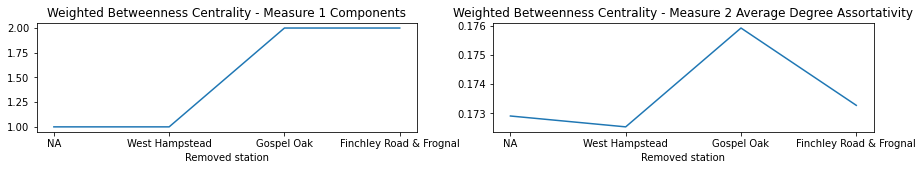

In [169]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,2))
ax1.plot(wbc_two_measure.removed_station, wbc_two_measure.M1_components)
ax1.set_title('Weighted Betweenness Centrality - Measure 1 Components')
ax1.set_xlabel('Removed station')
ax2.plot(wbc_two_measure.removed_station, wbc_two_measure.M2_degree_assort)
ax2.set_title('Weighted Betweenness Centrality - Measure 2 Average Degree Assortativity')
ax2.set_xlabel('Removed station')

#### adjusted two measure & new measure

In [170]:
wbc_list = []
for graph in graphs_wbc:
    wbc_list.append(adj_two_measure(graph))
wbc_adj_2_measure = pd.concat(wbc_list, ignore_index=True)
wbc_adj_2_measure['removed_station'] = ['NA'] + remove3_wbc
wbc_adj_2_measure

,edges,nodes,M1_components,M1_biggest_comp,M2_degree_assort,removed_station
0,467,401,1,401,0.409725,NA
1,463,400,1,400,0.409692,West Hampstead
2,460,399,2,397,0.408585,Gospel Oak
3,459,398,2,397,0.408135,Finchley Road & Frognal


In [171]:
wbc_list = []
for graph in graphs_wbc:
    wbc_list.append(new_measure(graph))
wbc_new_measure = pd.concat(wbc_list, ignore_index=True)
wbc_new_measure['removed_station'] = ['NA'] + remove3_wbc
wbc_new_measure

,edges,nodes,aver_shorte_path_length_w,removed_station
0,467,401,253936.011459,NA
1,463,400,295418.767920,West Hampstead
2,460,399,296335.974061,Gospel Oak
3,459,398,296335.974061,Finchley Road & Frognal


Text(0.5, 1.0, 'Weighted Betweenness Centrality - M3. Average Shortest Path Length')

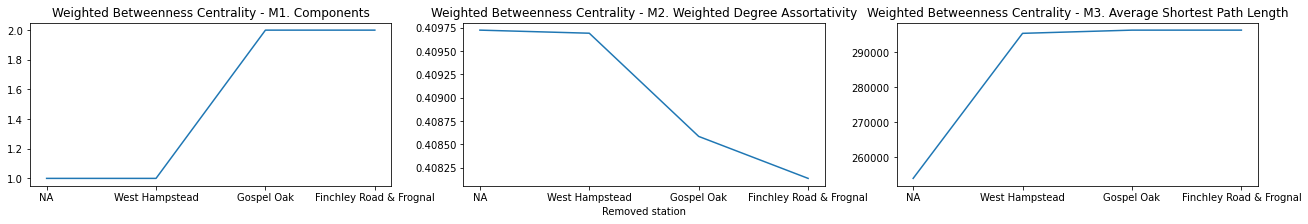

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(22,3))
ax1.plot(wbc_adj_2_measure.removed_station, wbc_adj_2_measure.M1_components)
ax1.set_title('Weighted Betweenness Centrality - M1. Components')
ax2.plot(wbc_adj_2_measure.removed_station, wbc_adj_2_measure.M2_degree_assort)
ax2.set_title('Weighted Betweenness Centrality - M2. Weighted Degree Assortativity')
ax2.set_xlabel('Removed station')
ax3.plot(wbc_new_measure.removed_station, wbc_new_measure.aver_shorte_path_length_w)
ax3.set_title('Weighted Betweenness Centrality - M3. Average Shortest Path Length')